# [AHA! Activity Health Analytics](http://casas.wsu.edu/)
[Center for Advanced Studies of Adaptive Systems (CASAS)](http://casas.wsu.edu/)

[Washington State University](https://wsu.edu)
# L8 Time Series Visualization

## Learner Objectives
At the conclusion of this lesson, participants should have an understanding of:
* Plotting time series data
* Generating sub plots with shared axis using matplotlib

## Acknowledgments
Content used in this lesson is based upon information in the following sources:
* [Matplotlib website](http://matplotlib.org/faq/usage_faq.html)

## Time Series Visualization
Now, we are ready to plot the time series data to gain some insights about the data. For the remainder of this lesson, we are going to investigate the "Sleep" activity because of its clear cyclic pattern in this particular smart home resident's routine. 

Let's first load the data into a dataframe.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fname = r"files\sh1_hourly_activities.csv"
df = pd.read_csv(fname, header=0, parse_dates={"DateTime": [0, 1]})
df.set_index("DateTime", inplace=True)

## Single Day
Initially, let's plot the first day's hourly sleep distribution using a bar plot. 

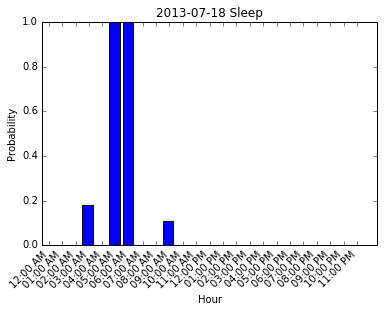

In [2]:
activity = "Sleep"

# grab the date for the first day
day1 = df.index[0].strftime("%Y-%m-%d")
# partial string datetime indexing
day1_ser = df.ix[day1][activity]

# plot each probability as a function of 24 hours
xvals = np.arange(len(day1_ser))
fig, ax = plt.subplots()
plt.bar(xvals, day1_ser.values)

# move the xtick locations to be hourly
xticklocs = np.arange(0.5, len(day1_ser) + 0.5, 1)
ax.set_xticks(xticklocs)
# shorten the time labels so they don't include the date (date will be in the title)
xticklabs = [t.strftime("%I:%M %p") for t in day1_ser.index]
ax.set_xticklabels(xticklabs, rotation=45, ha="right")

plt.xlabel("Hour")
plt.ylabel("Probability")
plt.title(day1 + " " + activity)
plt.show()

## Multiple Days
Now, let's see how this day compares to the rest of the week. Is the resident's sleep pattern fairly regular? We can visually answer this question by plotting each day's probabilities on the same plot:

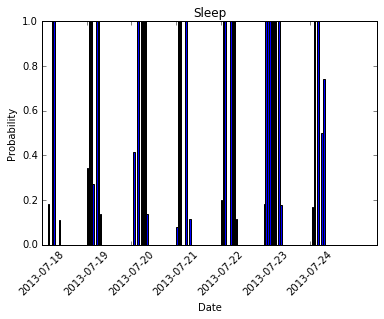

In [3]:
# get the timeseries data for all days for the activity of interest
all_ser = df[activity]

xvals = range(0, len(all_ser))
fig, ax = plt.subplots()
plt.bar(xvals, all_ser)

# go up by 24
date_ticklocs = range(0, len(all_ser), len(day1_ser))
ax.set_xticks(date_ticklocs)
# use the dates as time labels
date_labels = [date.strftime("%Y-%m-%d") for date in np.unique(all_ser.index.date)]
ax.set_xticklabels(date_labels, rotation=45, ha="center")
plt.xlabel("Date")
plt.ylabel("Probability")
plt.title(activity)
plt.show()

While the spikes in the plot appear to be uniformly spaced, it is difficult to discern what hours the sleep is occurring at each day. A more insightful approach to visualize this data, is to plot each individual day as we did in our single day example, but vertically stack all 7 days so their x-axis are aligned.

### Multiple Axes Example
We can make figures with multiple subplots (i.e. `Axes`). To do this we use the `subplot()` function. `subplot` expects three arguments, the number of rows of subplots, the number of subplots in each row (i.e. the number of columns), and which index of the subplot to set as the current `Axes` to plot. These three arguments are often combined to form a single integer argument. For example, this code creates a 2x2 grid of subplots and plots the squares line in 4 different colors :

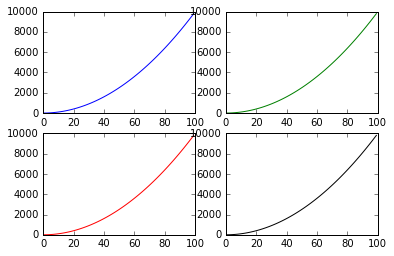

In [4]:
x = np.arange(0, 100)
squares = x ** 2
plt.subplot(221) # first (0, 0)
plt.plot(x, squares, c="blue")

plt.subplot(222) # second (0, 1)
plt.plot(x, squares, c="green")

plt.subplot(223) # third (1, 0)
plt.plot(x, squares, c="red")

plt.subplot(224) # fourth (1, 1)
plt.plot(x, squares, c="black")
plt.show()

### Multiple Days, Share Axis
Back to our activity dataset. We want to have 7 24-hour time series plots, stacked on top of each other. We want to plots to share the same x-axis (24 hour time series) and the same y-axis (0.0 to 1.0) so we can compare each plot on the same scale. We can achieve this with the `sharex` and `sharey` keywords of `subplots()`. For more information, see this [Matplotlib subplots example]([Matplotlib subplots example](https://matplotlib.org/examples/pylab_examples/subplots_demo.html).

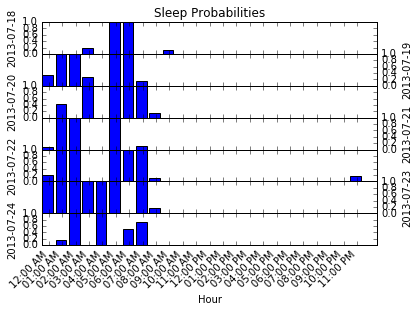

In [5]:
num_days = len(date_labels)
fig, axes = plt.subplots(num_days, sharex=True, sharey=True)

xvals = range(len(day1_ser))

for i, date in enumerate(date_labels):
    ax = axes[i]
    date_ser = df.ix[date][activity]
    ax.bar(xvals, date_ser)
    ax.set_ylabel(date)
    # set every other subplot to have y labels on the right side to not crowd the left side
    if i % 2 == 1:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")

axes[-1].set_xticks(xticklocs)
axes[-1].set_xticklabels(xticklabs, rotation=45, ha="right")
axes[0].set_title(activity + " Probabilities")
plt.xlabel("Hour")
# push the plots together with no extra space between them
fig.subplots_adjust(hspace=0)
# remove the x axis labels on all plots except the bottom one
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.show()    

### Multiple Days, Aggregated
Now let's collapse all 7 days down into a single day by averaging each hour. For example, 12:00AM aggregated would be an average of: 

$$\frac{Day1_{12:00AM} + ... + DayN_{12:00AM}}{N}$$

In our particular example, $N = 7$. We will aggregate each hour to construct a 24 hour series of aggregated sleep probabilities from 1 week of data.

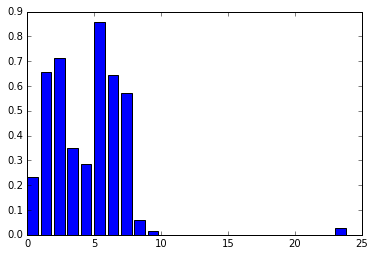

In [6]:
# want daily average for each hour
ser = df[activity]
# quick access to the hour date field
mean_ser = ser.groupby(ser.index.hour).mean()
plt.bar(mean_ser.index, mean_ser)
plt.show()